In [1]:
from tool import *
import plotly.express as px
# import matplotlib.pyplot as plt

# 1. 특정 모델/특정 Site의 현재부터 이후 구간의 과거부터 현재까지의 물동 변동 이력 조회

In [106]:
interval = 20 # 금주 이후 몇주 동안의 변동을 조회할 지 설정
period = 20 # 과거 몇주 간의 변동을 조회할 지 설정
thisweek = get_weekname(datetime.date.today()) # 이번주의 Weekname 가져옴
ver = 'Latest' # Forecast 변동을 조회할 version 설정(Latest, Final, ODM Release)
model = r'14T90Q' # Forecast 변동을 조회할 모델 설정(.로 하면 모든 모델)
site = r'.' # 조회할 법인명(.로 하면 모든 법인)
forecast_period = [get_weekname_from(thisweek, i) for i in range(interval)] # forecast 변동을 보고 싶은 구간 설정
history_period = [get_weekname_from(thisweek, i) for i in range(-period, 0, 1)] # Forecast 변동 이력을 조회할 구간 설정

with open('D:/Data/GSCP raw data.bin', 'rb') as f:
    df = pickle.load(f)

df = df[df['Mapping Model.Suffix'].apply(lambda x:x.split('-')[0]).replace(srt_model).str.contains(model)] # 조회할 모델로만 Sorting 함
# 데이터프레임 추출 조건 설정
c1 = df['Updated_at'].isin(df[['Ref', 'Ver', 'Updated_at']].drop_duplicates().groupby(['Ref', 'Ver'])['Updated_at'].max().unstack()[ver]) # 찾고자 하는 ver별의 가장 최근 update 된 시간으로 조회하기 위한 조건
c2 = (df['Ver'] == ver) # 조회할 Version 만 sorting 하기 위한 조건
c3 = df['Ref'].isin(history_period) # Forecast 변동 이력을 조회할 구간만 sorting 하기 위한 조건
c4 = df['To Site'].str.contains(site)

df = df[c1 & c2 & c3 & c4].groupby('Ref').sum()[forecast_period]
df = monthly_sum(df, 'Ref').stack().reset_index()
df.rename(columns={'level_1':'Month', 0:'QTY'}, inplace=True)
fig = px.bar(df, x='Ref', y='QTY', color='Month', width=500, height=400, title=f'{model} Variation History')
fig.update_xaxes(tickangle=70)
fig.show()

C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_3272\1257051669.py:20: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# 2. 특정모델/특정Site의 과거 특정시점 이후 물동의 변동결과

In [104]:
starting_date = datetime.date(2023, 1, 3) # 조회 시작할 과거 특정일
startweek = get_weekname(starting_date) # 이번주의 Weekname 가져옴
# start_month = (starting_date.isocalendar().year, get_month_from_date(starting_date))
interval = 50 # 시작주 이후 몇주 동안의 변동을 조회할 지 설정
period = 15 # 미래 몇주 간의 변동을 조회할 지 설정
ver = 'Latest' # 물동 변동을 조회할 version 설정(Latest, Final, ODM Release)
model = r'14T90Q' # Forecast 변동을 조회할 모델 설정(.로 하면 모든 모델)
site = r'.' # 조회할 법인명(.로 하면 모든 법인)
target_period = [get_weekname_from(startweek, i) for i in range(interval)]
variation_period = [get_weekname_from(startweek, i) for i in range(period)]

with open('D:/Data/GSCP raw data.bin', 'rb') as f:
    df = pickle.load(f)

df = df[df['Mapping Model.Suffix'].apply(lambda x:x.split('-')[0]).replace(srt_model).str.contains(model)] # 조회할 모델로만 Sorting 함

# 데이터프레임 추출 조건 설정
c1 = df['Updated_at'].isin(df[['Ref', 'Ver', 'Updated_at']].drop_duplicates().groupby(['Ref', 'Ver'])['Updated_at'].max().unstack()[ver]) # 찾고자 하는 ver별의 가장 최근 update 된 시간으로 조회하기 위한 조건
c2 = (df['Ver'] == ver) # 조회할 Version 만 sorting 하기 위한 조건
c3 = df['Ref'].isin(variation_period) # Forecast 변동 이력을 조회할 구간만 sorting 하기 위한 조건
c4 = df['To Site'].str.contains(site)

df = df[c1 & c2 & c3 & c4].groupby('Ref').sum()[target_period]
for wk in df.index:
    if (datetime.date.fromisoformat(wk[:10]).isocalendar().year, get_month_from_date(datetime.date.fromisoformat(wk[:10]))) >= (move_month(starting_date.isocalendar()[0], get_month_from_date(starting_date), 2)):
        df.loc[wk, startweek:get_weekname_from(get_weeklist_for_certain_month(get_lastmonth(wk)[0], get_lastmonth(wk)[1])[0], -1)] = df.loc[get_weekname_from(wk, -1), startweek:get_weekname_from(get_weeklist_for_certain_month(get_lastmonth(wk)[0], get_lastmonth(wk)[1])[0], -1)]
df = monthly_sum(df, 'Ref').stack().reset_index()
df.rename(columns={'level_1':'Month', 0:'QTY'}, inplace=True)
fig = px.bar(df, x='Ref', y='QTY', color='Month', width=500, height=400, title=f'{model} Variation History')
fig.update_xaxes(tickangle=70)
fig.show()

C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_3272\2950904878.py:23: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [11]:
thisweek = get_weekname(datetime.date.today())
wklist = [get_weekname_from(thisweek, i) for i in range(-5, 1)]

In [12]:
# GSCP DB에서 ver, 업체명, 조회할주차, 조회할 모델을 주면 해당 SP의 변동 이력을 출력하는 함수
def get_sp_history(ver, vendor, search_week, search_model_list):
    sp_history = pd.DataFrame()
    for model in search_model_list:
        for week in wklist:
            sp = get_sp_from_GSCP_DB(week, ver, vendor)
            sp.insert(0, 'Ref', week)
            sp_history = pd.concat([sp_history, sp[sp['Mapping Model.Suffix'] == model]])
    return sp_history.fillna(0)

In [13]:
ver = 'Final'
vendor = 'Quanta'
search_models = ['15UG50P-G.AA7FKN', '15UG50P-G.AR3DKN', '15U50P-L.AR2BL']

In [14]:
history = get_sp_history(ver, vendor, wklist, search_models)

In [15]:
history.to_clipboard()

In [47]:
pdr = get_pdr()[['Model.Suffix', '1.2 SET COLOR']]
pdr = pdr.rename(columns={'Model.Suffix':'Mapping Model.Suffix', '1.2 SET COLOR':'COLOR'})
pdr

,Mapping Model.Suffix,COLOR
0,11TG50Q-C.AC10KN,GRAY
1,11TC50Q-E.AC11ML,GRAY
2,11TG50Q-E.AC10KN,GRAY
3,11TC50Q-E.AC10ML,GRAY
4,11TC50Q-E.AC10K,GRAY
...,...,...
561,16T90R-G.AP75A3,BLACK
562,16T90R-G.CD78C,BLACK
563,16T90R-K.AAC7U1,BLACK
564,16T90R-K.AAC8U1,BLACK


In [50]:
history.merge(pdr).to_clipboard()

In [2]:
# general options
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',30)

In [9]:
get_difference_table(sp1, sp2, '-\d\d').sum()

2022-10-03(W40)       0
2022-10-10(W41)       0
2022-10-17(W42)       0
2022-10-24(W43)       0
2022-10-31(W44)    1010
                   ... 
2023-10-09(W41)       0
2023-10-16(W42)       0
2023-10-23(W43)       0
2023-10-30(W44)       0
2023-11-06(W45)       0
Length: 58, dtype: int64

In [4]:
today = datetime.date(2022, 11, 7)
sp1_week = get_weekname(today)
sp2_week = get_weekname_from(sp1_week, 0)
sp1_ver = 'Final'
sp2_ver = 'ODM Release'
vendor = 'Quanta'
print(f'1. 기준이 되는 SP는 {vendor}의 {sp1_week} 주차의 {sp1_ver} 버전')
print(f'2. 비교할 대상 SP는 {vendor}의 {sp2_week} 주차의 {sp2_ver} 버전')

sp1 = get_sp_from_GSCP_DB(sp1_week, sp1_ver, vendor)
sp2 = get_sp_from_GSCP_DB(sp2_week, sp2_ver, vendor)
if vendor == 'Wanlida':
    mon_sum = category_sum(get_difference_table(sp1, sp2, '-\d\d').reset_index().rename(columns={'level_0':'Mapping Model.Suffix'}).groupby('Mapping Model.Suffix').sum())
else:
    mon_sum = category_sum(get_difference_table(sp1, sp2, '-\d\d').reset_index().rename(columns={'level_0':'Series'}).groupby('Series').sum())
mon_sum.loc['Total'] = mon_sum.sum()
start_col = category_sum(sp1).columns[0]
end_col = mon_sum.loc[:, mon_sum.sum() != 0].columns.max()
mon_sum = mon_sum.loc[:, start_col:end_col]
mon_sum.loc[:, 'Total'] = mon_sum.sum(axis=1)
mon_sum

1. 기준이 되는 SP는 Quanta의 2022-11-07(W45) 주차의 Final 버전
2. 비교할 대상 SP는 Quanta의 2022-11-07(W45) 주차의 ODM Release 버전


TypeError: cannot do slice indexing on Index with these indexers [nan] of type float

In [10]:
sp_all = pd.DataFrame()
for wk in wklist:
    sp = get_sp_from_GSCP_DB(wk, 'Latest', 'Quanta')
    sp['Ref'] = wk
    sp_all = pd.concat([sp_all, sp])
sp_all

,Series,Mapping Model.Suffix,Region,Country,To Site,2022-11-28(W48),2022-12-05(W49),2022-12-12(W50),2022-12-19(W51),2022-12-26(W52),...,2023-12-11(W50),2023-12-18(W51),2023-12-25(W52),2024-01-01(W01),2024-01-08(W02),2024-01-15(W03),2024-01-22(W04),2024-01-29(W05),2024-02-05(W06),Ref
0,11T50Q,11TG50Q-C.AC10KN,KOREA,Korea,EKHQ,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,2023-01-02(W01)
1,11T50Q,11TG50Q-E.AC10KN,KOREA,Korea,EKHQ,0,0,120,576,0,...,0,0,0,0,0,0,0,0,0,2023-01-02(W01)
2,14T90P,14T90P-G.ARTGK,KOREA,Korea,EKHQ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-01-02(W01)
3,14T90Q,14T90Q-G.AA55A3,SEA,Singapore,EASL,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,2023-01-02(W01)
4,14T90Q,14T90Q-G.AA55Y,EU,Poland,EEPL,0,0,20,0,0,...,0,0,0,0,0,0,0,0,0,2023-01-02(W01)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,16T90Q,16TD90Q-G.AX70K,KOREA,Korea,EKHQ,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,2023-02-13(W07)
141,16T90R,16TD90R-G.AX56K,KOREA,Korea,EKHQ,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,2023-02-13(W07)
142,16T90R,16TD90R-G.AX76K,KOREA,Korea,EKHQ,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,2023-02-13(W07)
143,16T90Q,16TG90Q-G.AA75KN,KOREA,Korea,EKHQ,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,2023-02-13(W07)


In [14]:
sp_all[sp_all['Mapping Model.Suffix'] == '16T90R-G.AA5CK'].to_clipboard()

### Quanta Forecast

In [3]:
with open('D:/Data/Quanta forecast.bin', 'rb') as f:
    df = pickle.load(f)

In [4]:
df = df[df['Series'] == '11T50Q']

In [34]:
df = df[df['Mapping Model.Suffix'] == '11TG50Q-E.AC10KN']

In [5]:
df.groupby(['Ref_week', 'Mapping Model.Suffix']).sum().to_excel('d:/Python result/a.xlsx')

In [30]:
df = df.groupby(['Ref_week', 'Mapping Model.Suffix']).sum().stack().reset_index()
df.rename(columns={'level_2':'Week', 0:'QTY'}, inplace=True)
df

,Ref_week,Mapping Model.Suffix,Week,QTY
0,2022-01-03(W01),11TG50Q-E.AC10KN,2021-11-29(W48),0
1,2022-01-03(W01),11TG50Q-E.AC10KN,2021-12-06(W49),7
2,2022-01-03(W01),11TG50Q-E.AC10KN,2021-12-13(W50),0
3,2022-01-03(W01),11TG50Q-E.AC10KN,2021-12-20(W51),0
4,2022-01-03(W01),11TG50Q-E.AC10KN,2021-12-27(W52),0
...,...,...,...,...
1363,2022-06-13(W24),11TG50Q-E.AC10KN,2022-11-28(W48),100
1364,2022-06-13(W24),11TG50Q-E.AC10KN,2022-12-05(W49),95
1365,2022-06-13(W24),11TG50Q-E.AC10KN,2022-12-12(W50),100
1366,2022-06-13(W24),11TG50Q-E.AC10KN,2022-12-19(W51),100


In [4]:
df = category_sum(df.groupby(['Ref_week', 'Series']).sum())

In [5]:
df = df.stack().reset_index()
df.rename(columns={'level_2':'Month'})

,Ref_week,Series,Month,0
0,2022-01-03(W01),11T50Q,2021-12,7
1,2022-01-03(W01),11T50Q,2022-01,350
2,2022-01-03(W01),11T50Q,2022-02,1970
3,2022-01-03(W01),11T50Q,2022-03,950
4,2022-01-03(W01),11T50Q,2022-04,0
...,...,...,...,...
3401,2022-06-13(W24),16T90Q,2022-08,3145
3402,2022-06-13(W24),16T90Q,2022-09,7675
3403,2022-06-13(W24),16T90Q,2022-10,9530
3404,2022-06-13(W24),16T90Q,2022-11,6725


In [6]:
df = df.rename(columns={'level_2':'Month'})

In [7]:
df = df.rename(columns={0:'QTY'})

In [24]:
import seaborn as sns

In [10]:
cond2 = df['Ref_week'].isin(df['Ref_week'].unique()[-4:])

<AxesSubplot:xlabel='Week', ylabel='QTY'>

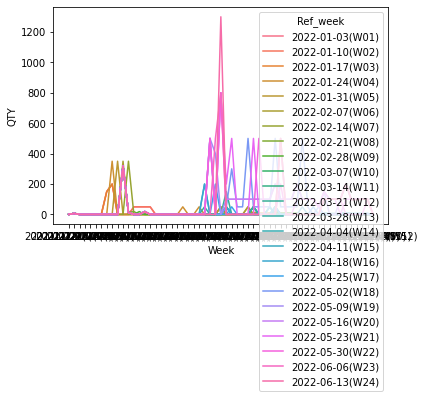

In [31]:
sns.lineplot(x='Week', y='QTY', data=df, hue='Ref_week')

In [6]:
df = df.groupby(['Ref_week','Series', 'Region', 'To Site', 'Model.Suffix']).sum()
df

2021-11-29(W48)  \
Ref_week        Series Region To Site  Model.Suffix                        
2022-01-03(W01) 11T50Q KOREA  EKHQ     11TC50Q-E.AC10K                 0   
                                       11TG50Q-E.AC10KN                0   
                14T90P CHINA  ECNT_P   14T90P-G.AA54C                  0   
                                       14T90P-G.AA77C                  0   
                       EU     EEES     14T90P-G.AA78B                  0   
...                                                                  ...   
2022-06-06(W23) 16T90Q SEA    EHAP_LGS 16T90Q-G.AA55A                  0   
                                       16T90Q-G.AA75A                  0   
                                       16T90Q-G.AA78A                  0   
                              EJJP     16T90Q-K.AA75J                  0   
                                       16T90Q-K.AA78J                  0   

                                                         2021-12-06(W49)  \
Ref_week        Series Region To Site  Model.Suffix                        
2022-01-03(W01) 11T50Q KOREA  EKHQ     11TC50Q-E.AC10K                 0   
                                       11TG50Q-E.AC10KN                7   
                14T90P CHINA  ECNT_P   14T90P-G.AA54C                  0   
                                       14T90P-G.AA77C                  0   
                       EU     EEES     14T90P-G.AA78B                  0   
...                                                                  ...   
2022-06-06(W23) 16T90Q SEA    EHAP_LGS 16T90Q-G.AA55A                  0   
                                       16T90Q-G.AA75A                  0   
                                       16T90Q-G.AA78A                  0   
                              EJJP     16T90Q-K.AA75J                  0   
                                       16T90Q-K.AA78J                  0   

                                                         2021-12-13(W50)  \
Ref_week        Series Region To Site  Model.Suffix                        
2022-01-03(W01) 11T50Q KOREA  EKHQ     11TC50Q-E.AC10K                 0   
                                       11TG50Q-E.AC10KN                0   
                14T90P CHINA  ECNT_P   14T90P-G.AA54C                  0   
                                       14T90P-G.AA77C                  0   
                       EU     EEES     14T90P-G.AA78B                  0   
...                                                                  ...   
2022-06-06(W23) 16T90Q SEA    EHAP_LGS 16T90Q-G.AA55A                  0   
                                       16T90Q-G.AA75A                  0   
                                       16T90Q-G.AA78A                  0   
                              EJJP     16T90Q-K.AA75J                  0   
                                       16T90Q-K.AA78J                  0   

                                                         2021-12-20(W51)  \
Ref_week        Series Region To Site  Model.Suffix                        
2022-01-03(W01) 11T50Q KOREA  EKHQ     11TC50Q-E.AC10K                 0   
                                       11TG50Q-E.AC10KN                0   
                14T90P CHINA  ECNT_P   14T90P-G.AA54C                  0   
                                       14T90P-G.AA77C                  0   
                       EU     EEES     14T90P-G.AA78B                  0   
...                                                                  ...   
2022-06-06(W23) 16T90Q SEA    EHAP_LGS 16T90Q-G.AA55A                  0   
                                       16T90Q-G.AA75A                  0   
                                       16T90Q-G.AA78A                  0   
                              EJJP     16T90Q-K.AA75J                  0   
                                       16T90Q-K.AA78J                  0   

                                                         2021-12-27(W52)  \
Ref_week        Series Re

In [7]:
df = df.reset_index()

In [9]:
cond1 = (df['Series'] == '15U50Q')

In [10]:
df[cond1]

,Ref_week,Series,Region,To Site,Model.Suffix,2021-11-29(W48),2021-12-06(W49),2021-12-13(W50),2021-12-20(W51),2021-12-27(W52),2022-01-03(W01),2022-01-10(W02),2022-01-17(W03),2022-01-24(W04),2022-01-31(W05),2022-02-07(W06),2022-02-14(W07),2022-02-21(W08),2022-02-28(W09),2022-03-07(W10),2022-03-14(W11),2022-03-21(W12),2022-03-28(W13),2022-04-04(W14),2022-04-11(W15),2022-04-18(W16),2022-04-25(W17),2022-05-02(W18),2022-05-09(W19),2022-05-16(W20),2022-05-23(W21),2022-05-30(W22),2022-06-06(W23),2022-06-13(W24),2022-06-20(W25),2022-06-27(W26),2022-07-04(W27),2022-07-11(W28),2022-07-18(W29),2022-07-25(W30),2022-08-01(W31),2022-08-08(W32),2022-08-15(W33),2022-08-22(W34),2022-08-29(W35),2022-09-05(W36),2022-09-12(W37),2022-09-19(W38),2022-09-26(W39),2022-10-03(W40),2022-10-10(W41),2022-10-17(W42),2022-10-24(W43),2022-10-31(W44),2022-11-07(W45),2022-11-14(W46),2022-11-21(W47),2022-11-28(W48),2022-12-05(W49),2022-12-12(W50),2022-12-19(W51),2022-12-26(W52)
283,2022-01-10(W02),15U50Q,KOREA,EKHQ,15U50Q,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4700,0,0,0,6700,0,0,0,0,8300,0,0,0,9500,0,0,0,9500,0,0,0,8500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
646,2022-01-24(W04),15U50Q,KOREA,EKHQ,15U50Q-G.AA3IK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,100,100,0,100,0,100,0,100,0,100,0,100,0,0,100,0,0,16,36,36,74,38,38,38,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647,2022-01-24(W04),15U50Q,KOREA,EKHQ,15U50Q-G.AA56K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,100,0,0,0,0,100,0,0,0,0,0,0,0,26,16,15,14,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0
648,2022-01-24(W04),15U50Q,KOREA,EKHQ,15U50Q-G.AA5IK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,600,300,200,0,300,300,300,200,200,200,200,100,100,100,100,100,90,128,128,128,128,261,135,134,132,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0
649,2022-01-24(W04),15U50Q,KOREA,EKHQ,15U50Q-G.AR30K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,400,200,200,0,200,200,200,200,100,100,100,100,100,100,0,100,0,54,74,74,72,148,77,76,76,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844,2022-06-06(W23),15U50Q,KOREA,EKHQ,15U50Q-G.AR50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,0,0,75,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,50,0,0,0,0,0
4845,2022-06-06(W23),15U50Q,KOREA,EKHQ,15U50Q-G.AR50ML,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4846,2022-06-06(W23),15U50Q,KOREA,EKHQ,15U50Q-G.AS50ML,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4847,2022-06-06(W23),15U50Q,KOREA,EKHQ,15UD50Q-G.AX30K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,100,50,100,50,0,100,50,100,150,50,100,50,50,150,50,50,50,150,0,0,20,80,0


In [4]:
df_sum = monthly_sum(df, ['Ref_week', 'Series', 'Nation', 'Model.Suffix'])

In [5]:
df_sum['Sum'] = df_sum.sum(axis=1)
df_sum.to_excel('D:/Python result/Quanta Forecast waterfall.xlsx', merge_cells=False)

### Pegatron Forecast

In [3]:
thisweek = get_weekname(datetime.date.today())

In [2]:
with open('D:/Data/Pegatron forecast.bin', 'rb') as f:
    df = pickle.load(f)

In [29]:
df_sum = monthly_sum(df, ['Ref_week', 'Series', 'Nation'])
df_sum['Sum'] = df_sum.sum(axis=1)

In [30]:
df_sum.to_excel('D:/Python result/Pegatron Forecast waterfall.xlsx', merge_cells=False)

In [28]:
with open('D:/Data/Pegatron forecast.bin', 'wb') as f:
    pickle.dump(df, f)

# GSCP 주별 SP 자료 다운받고 각 주별 변동 이력 시각화 하기

In [4]:
# 필요한 모듈을 불러옴
from tool import *
import plotly.express as px

In [115]:
series = ['16T90R']

In [2]:
with open('D:/Data/GSCP raw data.bin', 'rb') as f:
    sp_all = pickle.load(f)

sp_all = sp_all[sp_all['Ver'] == 'Final']

In [112]:
sp_all['Series'] = sp_all['Mapping Model.Suffix'].apply(lambda x:x.split('-')[0]).replace(srt_model)

C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_13628\2409887673.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
sp_all = sp_all[sp_all['Series'].isin(series)]

In [124]:
sp_all.groupby(['Ref', 'Updated_at']).sum()

C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_13628\1324916333.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,,Frozen,2022-08-01(W31),2022-08-08(W32),2022-08-15(W33),2022-08-22(W34),2022-08-29(W35),2022-09-05(W36),2022-09-12(W37),2022-09-19(W38),2022-09-26(W39),...,2024-03-18(W12),2024-03-25(W13),2024-04-01(W14),2024-04-08(W15),2024-04-15(W16),2024-04-22(W17),2024-04-29(W18),2024-05-06(W19),2024-05-13(W20),2024-05-20(W21)
Ref,Updated_at,,,,,,,,,,,,,,,,,,,,,
2023-01-02(W01),23010408,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-09(W02),23011014,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-16(W03),23011810,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-23(W04),23012510,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-30(W05),23013114,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-02-06(W06),23020807,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-02-13(W07),23021509,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-02-20(W08),23022213,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-02-27(W09),23022822,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df_plot = monthly_sum(sp_all.groupby(['Ref', 'Updated_at']).sum().loc[pd.MultiIndex.from_frame(sp_all.groupby('Ref')['Updated_at'].max().reset_index())].reset_index(), 'Ref')

C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_13628\641350049.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [100]:
df_plot = df_plot.loc[:, df_plot.sum() > 0]

In [102]:
df_plot.to_clipboard()

In [103]:
df_plot

,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
REF,,,,,,,,,,,,,,,,,,
2022-04-11(W15),0.0,850.0,850.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-18(W16),0.0,850.0,850.0,1200.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-25(W17),0.0,850.0,850.0,1200.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-02(W18),0.0,850.0,850.0,1200.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-09(W19),1.0,700.0,1000.0,1200.0,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22(W21),0.0,1760.0,1080.0,0.0,0.0,1320.0,680.0,1860.0,720.0,220.0,0.0,0.0,0.0,6560.0,0.0,0.0,0.0,0.0
2023-05-29(W22),0.0,1760.0,1080.0,0.0,0.0,1320.0,680.0,1860.0,720.0,220.0,0.0,0.0,0.0,6560.0,0.0,0.0,0.0,0.0
2023-06-05(W23),0.0,1760.0,1080.0,0.0,0.0,1320.0,680.0,1860.0,720.0,220.0,0.0,0.0,0.0,6560.0,0.0,0.0,0.0,0.0


In [113]:
df_plot = acc_sp.groupby('REF').sum().sum(axis=1).reset_index()
df_plot.rename(columns={0:'QTY'}, inplace=True)
fig = px.line(df_plot, x='REF', y='QTY')
fig.update_layout(plot_bgcolor='#ffffff')

C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_544\4044175204.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [104]:
fig = px.bar(df_plot.groupby('REF').sum().reset_index(), x='REF', y='QTY', text_auto=True)
fig.update_layout(plot_bgcolor='#ffffff')

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['REF', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11'] but received: QTY

In [87]:
fig = px.line(df_plot.groupby('REF').sum().reset_index(), x='REF', y='QTY')
fig.update_layout(plot_bgcolor='#ffffff')

C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_544\801028766.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [106]:
df_plot = df_plot.stack().reset_index()
df_plot.rename(columns={'level_1':'Month', 0:'QTY'}, inplace=True)
fig = px.bar(df_plot, x='REF', y='QTY', color='Month', width=1200, height=800, title = '10A30Q SP History')
fig.update_xaxes(tickangle=60)
fig.update_layout(plot_bgcolor='#ffffff')

In [140]:
max_idx = df_plot.duplicated()
max_idx = max_idx[max_idx == False].index.max()
max_idx

'2023-05-29(W22)'

In [144]:
df_plot = df_plot.loc[:max_idx]
df_plot = df_plot.stack().reset_index()
df_plot.rename(columns={'level_1':'Month', 0:'QTY'}, inplace=True)
fig = px.bar(df_plot, x='Ref', y='QTY', color='Month', width=1200, height=800, title = f'{series} SP History')
fig.update_xaxes(tickangle=60)
fig

### SP자료 다운받은 폴더의 각 파일을 불러와 누적 SP 데이터프레임 만들기

### 1) 누적 SP의 초기값을 만듬

In [60]:
# 임시 Pegatron SP(ODM배포 버젼) 변동 현황 구하기
os.chdir('D:/SP현황/Pegatron')

In [61]:
col1 = ['From Site', 'To Site', 'Region', 'Model.Suffix']
path = 'D:/SP현황/Pegatron/'
filepath = path + os.listdir()[0]
tab_name = 'SP_' + filepath.split('.')[0][-5:-1]
acc_sp = pd.read_excel(filepath, sheet_name=tab_name, skiprows=5, keep_default_na=False, na_values=['', 'nan'])
trim_column_name(acc_sp)
acc_sp = acc_sp[col1+get_weeklist(acc_sp)]
wk_name = '2021-05-10(W19)'
acc_sp.insert(0, 'REF', wk_name)
acc_sp = acc_sp.groupby(['REF']+col1).sum(numeric_only=True)
wk_name = get_weekname_from(wk_name, 1)
print(filepath)
acc_sp

D:/SP현황/Pegatron/2105_W19_Pegatron FCST_0510W.xlsb


2021-03-29(W13)  \
REF             From Site        To Site Region Model.Suffix                       
2021-05-10(W19) OS_PEGATRON_CN_P EEES    EU     13U70P-G.AA75B                 0   
                                                13U70P-G.AR55B                 0   
                                                14T90N-V.AA78B                 0   
                                                14T990-G.AA75B                 0   
                                                17U70N-J.AA78B                 0   
...                                                                          ...   
                                 ENUS_V  NA     14T90N-R.AAS9U1                0   
                                                14T90N-R.APS7U1                0   
                                                17U70N-R.AAS7U1                0   
                                                17U70N-R.AAS8U1                0   
                                                17U70P-P.AAS8U1                0   

                                                                 2021-04-05(W14)  \
REF             From Site        To Site Region Model.Suffix                       
2021-05-10(W19) OS_PEGATRON_CN_P EEES    EU     13U70P-G.AA75B                 0   
                                                13U70P-G.AR55B                 0   
                                                14T90N-V.AA78B                 0   
                                                14T990-G.AA75B                 0   
                                                17U70N-J.AA78B                 0   
...                                                                          ...   
                                 ENUS_V  NA     14T90N-R.AAS9U1                0   
                                                14T90N-R.APS7U1               80   
                                                17U70N-R.AAS7U1                0   
                                                17U70N-R.AAS8U1                0   
                                                17U70P-P.AAS8U1                0   

                                                                 2021-04-12(W15)  \
REF             From Site        To Site Region Model.Suffix                       
2021-05-10(W19) OS_PEGATRON_CN_P EEES    EU     13U70P-G.AA75B                 0   
                                                13U70P-G.AR55B                 0   
                                                14T90N-V.AA78B                 0   
                                                14T990-G.AA75B                 0   
                                                17U70N-J.AA78B                 0   
...                                                                          ...   
                                 ENUS_V  NA     14T90N-R.AAS9U1                0   
                                                14T90N-R.APS7U1               10   
                                                17U70N-R.AAS7U1                0   
                                                17U70N-R.AAS8U1                0   
                                                17U70P-P.AAS8U1                0   

                                                                 2021-04-19(W16)  \
REF             From Site        To Site Region Model.Suffix                       
2021-05-10(W19) OS_PEGATRON_CN_P EEES    EU     13U70P-G.AA75B                 0   
                                                13U70P-G.AR55B                 0   
                                                14T90N-V.AA78B                 0   
                                                14T990-G.AA75B                 0   
                                                17U70N-J.AA78B                 0   
...                                                                          ...   
                                 ENUS_V  NA     14T90N-R.AAS9U1                0   
                              

In [62]:
os.chdir(path+'SPS') # 반복을 위해 해당 폴더 이동

In [63]:
for fn in tqdm(os.listdir()):
    filepath = path + 'SPS/' + fn # 다음 파일경로명 설정
    tab_name = 'SP_' + filepath.split('.')[0][-5:-1]
    try:
        df = pd.read_excel(filepath, sheet_name=tab_name, skiprows=5, keep_default_na=False, na_values=['', 'nan'])
    except:
        tab_name = 'W' + filepath.split('.')[0][-5:-1]
        df = pd.read_excel(filepath, sheet_name=tab_name, skiprows=5, keep_default_na=False, na_values=['', 'nan'])
    trim_column_name(df)
    deleted_wk = []
    for item in get_weeklist(acc_sp):
        if item not in get_weeklist(df):
            deleted_wk.append(item)

    df = df[col1+get_weeklist(df)]
    df.insert(0, 'REF', wk_name)
    df = df.groupby(['REF'] + col1).sum(numeric_only=True)
    
    org_idx = acc_sp.reset_index().set_index(col1).index
    new_idx = df.reset_index().set_index(col1).index
    intersecting_idx = org_idx.intersection(new_idx)
    diff_idx_org = org_idx.difference(intersecting_idx) # 첫 번째 인덱스에서 2번째 인덱스를 뺀 차집합 인덱스
    
    # 누적 데이터프레임에서 동일 index값이 가장 최근에 언제 주차에 있었는지 참조하기 위한 Series
    find_most_recent_week = acc_sp.reset_index()[['REF']+col1].groupby(col1)['REF'].max()
    idx_frame1 = find_most_recent_week[diff_idx_org].reset_index()[['REF'] + col1] # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임1
    m_idx1 = pd.MultiIndex.from_frame(idx_frame1) # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 idx
    add_df = acc_sp.loc[m_idx1, :get_weekname_from(wk_name, -1)]
    for w in find_most_recent_week[diff_idx_org]: # 누적 데이터프레임에서 차집합 인덱스를 반복하면서
        if w < get_weekname_from(wk_name, -1):    # 해당 최근주차가 지난주보다 작을 때
            add_df.loc[w, w:] = 0                 # 해당 최근주차부터 이후 주차의 값은 '0' 으로 만듬(왜냐하면, 기존값은 실적이 아니므로)

    add_df = add_df[add_df.sum(axis=1) > 0]
    
    # deleted_wk 에 값이 있을 경우 df에 이전주차까지의 누적 데이터프레임의 삭제된 주차들의 선적 실적을 추가하는 작업
    if len(deleted_wk) > 0:
        idx_frame2 = find_most_recent_week[intersecting_idx].reset_index()[['REF']+col1] # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임1
        idx_frame3 = idx_frame2.copy() # 누적 데이터프레임에서 업데이트할 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임2
        idx_frame3['REF'] = wk_name
        m_idx2 = pd.MultiIndex.from_frame(idx_frame2) # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 idx
        m_idx3 = pd.MultiIndex.from_frame(idx_frame3) # 누적 데이터프레임에서 업데이트할 행을 지정하기 위한 idx
        df.loc[m_idx3, deleted_wk] = acc_sp.loc[m_idx2, deleted_wk].values
    
    # 좀 전에 구한 누적 데이터프레임에는 있었는데 사라진 행들을 신규 데이터프레임과 합침 
    df = pd.concat([add_df, df]).reset_index()
    df['REF'] = wk_name
    df = df.set_index(['REF'] + col1)
    
    # df를 기존 누적 데이터프레임에 합침
    acc_sp = pd.concat([acc_sp, df])
    
    # wk_name을 다음주로 증가시킨뒤 처음으로 되돌아감
    wk_name = get_weekname_from(wk_name, 1)

  1%|▊                                                                                 | 1/109 [00:00<00:30,  3.49it/s]C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_18180\476507145.py:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  add_df.loc[w, w:] = 0                 # 해당 최근주차부터 이후 주차의 값은 '0' 으로 만듬(왜냐하면, 기존값은 실적이 아니므로)
  2%|█▌                                                                                | 2/109 [00:00<00:34,  3.08it/s]C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_18180\476507145.py:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

In [64]:
acc_sp

2021-03-29(W13)  \
REF             From Site        To Site Region Model.Suffix                       
2021-05-10(W19) OS_PEGATRON_CN_P EEES    EU     13U70P-G.AA75B               0.0   
                                                13U70P-G.AR55B               0.0   
                                                14T90N-V.AA78B               0.0   
                                                14T990-G.AA75B               0.0   
                                                17U70N-J.AA78B               0.0   
...                                                                          ...   
2023-06-12(W24) OS_PEGATRON_CN_P ENUS_V  NA     13U70P-G.AAW7U1            100.0   
                                                13U70P-G.AAX7U1              NaN   
                                                13U70P-G.ARW5U1            175.0   
                                                17U70P-P.AAS8U1              0.0   
                                                17U70Q-P.AAS7U1              NaN   

                                                                 2021-04-05(W14)  \
REF             From Site        To Site Region Model.Suffix                       
2021-05-10(W19) OS_PEGATRON_CN_P EEES    EU     13U70P-G.AA75B               0.0   
                                                13U70P-G.AR55B               0.0   
                                                14T90N-V.AA78B               0.0   
                                                14T990-G.AA75B               0.0   
                                                17U70N-J.AA78B               0.0   
...                                                                          ...   
2023-06-12(W24) OS_PEGATRON_CN_P ENUS_V  NA     13U70P-G.AAW7U1              0.0   
                                                13U70P-G.AAX7U1              NaN   
                                                13U70P-G.ARW5U1              0.0   
                                                17U70P-P.AAS8U1              0.0   
                                                17U70Q-P.AAS7U1              NaN   

                                                                 2021-04-12(W15)  \
REF             From Site        To Site Region Model.Suffix                       
2021-05-10(W19) OS_PEGATRON_CN_P EEES    EU     13U70P-G.AA75B               0.0   
                                                13U70P-G.AR55B               0.0   
                                                14T90N-V.AA78B               0.0   
                                                14T990-G.AA75B               0.0   
                                                17U70N-J.AA78B               0.0   
...                                                                          ...   
2023-06-12(W24) OS_PEGATRON_CN_P ENUS_V  NA     13U70P-G.AAW7U1              0.0   
                                                13U70P-G.AAX7U1              NaN   
                                                13U70P-G.ARW5U1              0.0   
                                                17U70P-P.AAS8U1              0.0   
                                                17U70Q-P.AAS7U1              NaN   

                                                                 2021-04-19(W16)  \
REF             From Site        To Site Region Model.Suffix                       
2021-05-10(W19) OS_PEGATRON_CN_P EEES    EU     13U70P-G.AA75B               0.0   
                                                13U70P-G.AR55B               0.0   
                                                14T90N-V.AA78B               0.0   
                                                14T990-G.AA75B               0.0   
                                                17U70N-J.AA78B               0.0   
...                                                                          ...   
2023-06-12(W24) OS_PEGATRON_CN_P ENUS_V  NA     13U70P-G.AAW7U1              0.0   
                              

In [138]:
col1 = ['Division', 'From Site', 'To Site', 'Region', 'Mapping Model.Suffix']
acc_sp = pd.read_excel('D:/SP현황/2021/W24.xls', keep_default_na=False, na_values=['', 'nan']) # 기초 데이터프레임을 만들기 위한 파일경로명 설정
acc_sp = acc_sp[acc_sp['Category'].str.contains('Final Plan') & acc_sp['From Site'].str.contains('PEGATR')]
trim_column_name(acc_sp)
wklist = get_weeklist(acc_sp)
acc_sp = acc_sp[col1+wklist]
wk_name = '2021-06-14(W24)'
acc_sp.insert(0, 'REF', wk_name)
acc_sp = acc_sp.groupby(['REF']+col1).sum()
wk_name = get_weekname_from(wk_name, 1)
acc_sp.head()

2021-01-04(W01)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2021-06-14(W24) MNT      OS_PEGATRON_CN_P EAIL_DC INDIA  CL600W-AC.ATRQ                      0   
                                          EEDG    EU     CL600N-6A.AEUQ                      0   
                                                         CL600W-1C.AEUQ                      0   
                                                         CL600W-AC.AEUQ                      0   
                                                         CL600W-AD.AEUQ                      0   

                                                                               2021-01-11(W02)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2021-06-14(W24) MNT      OS_PEGATRON_CN_P EAIL_DC INDIA  CL600W-AC.ATRQ                      0   
                                          EEDG    EU     CL600N-6A.AEUQ                      0   
                                                         CL600W-1C.AEUQ                      0   
                                                         CL600W-AC.AEUQ                      0   
                                                         CL600W-AD.AEUQ                      0   

                                                                               2021-01-18(W03)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2021-06-14(W24) MNT      OS_PEGATRON_CN_P EAIL_DC INDIA  CL600W-AC.ATRQ                      0   
                                          EEDG    EU     CL600N-6A.AEUQ                      0   
                                                         CL600W-1C.AEUQ                      0   
                                                         CL600W-AC.AEUQ                      0   
                                                         CL600W-AD.AEUQ                      0   

                                                                               2021-01-25(W04)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2021-06-14(W24) MNT      OS_PEGATRON_CN_P EAIL_DC INDIA  CL600W-AC.ATRQ                      0   
                                          EEDG    EU     CL600N-6A.AEUQ                      0   
                                                         CL600W-1C.AEUQ                      0   
                                                         CL600W-AC.AEUQ                      0   
                                                         CL600W-AD.AEUQ                      0   

                                                                               2021-02-01(W05)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2021-06-14(W24) MNT      OS_PEGATRON_CN_P EAIL_DC INDIA  CL600W-AC.ATRQ                      0   
                                          EEDG    EU     CL600N-6A.AEUQ                      0   
                                                         CL600W-1C.AEUQ                      0   
                                                         CL600W-AC.AEUQ                      0   
                                                         CL600W-AD.AEUQ                      0   

                                                                               2021-02-08(W06)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2021-06-14(W24) MNT      OS_PEGATRON_CN_P EAIL_DC INDIA  CL600W-AC.ATRQ                      0   
                                          EEDG    EU     CL600N-6A.AEUQ                    350   
                                                         CL600W-1C.AEUQ                     50   
                                                         CL600W-AC.AEUQ                      0   
                                                        

In [139]:
df = pd.read_excel('D:/SP현황/2021/W25.xls', keep_default_na=False, na_values=['', 'nan'])
df = df[df['Category'].str.contains('Final Plan') & df['From Site'].str.contains('PEGATRON')]
trim_column_name(df)
wklist = get_weeklist(df)
deleted_wk = []
for item in get_weeklist(acc_sp):
    if item not in get_weeklist(df):
        deleted_wk.append(item)

df = df[col1+get_weeklist(df)]
df.insert(0, 'REF', wk_name)
df = df.groupby(['REF'] + col1).sum()

org_idx = acc_sp.reset_index().set_index(col1).index
new_idx = df.reset_index().set_index(col1).index
intersecting_idx = org_idx.intersection(new_idx)
diff_idx_org = org_idx.difference(intersecting_idx) # 첫 번째 인덱스에서 2번째 인덱스를 뺀 차집합 인덱스

# 누적 데이터프레임에서 동일 index값이 가장 최근에 언제 주차에 있었는지 참조하기 위한 Series
find_most_recent_week = acc_sp.reset_index()[['REF']+col1].groupby(col1)['REF'].max()
idx_frame1 = find_most_recent_week[diff_idx_org].reset_index()[['REF'] + col1] # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임1
m_idx1 = pd.MultiIndex.from_frame(idx_frame1) # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 idx

In [145]:
acc_sp.loc[m_idx1, get_weekname_from(wk_name, -2)]

REF              Division  From Site         To Site  Region  Mapping Model.Suffix
2021-06-14(W24)  MNT       OS_PEGATRON_CN_P  EEDG     EU      CL600W-1C.AEUQ          0
                                             EKHQ     KOREA   CL600W-AC.AKRQ          0
                 PC        OS_PEGATRON_CN_P  EEES     EU      17U70N-J.AA78B          0
                                             EJJP     SEA     14T90N-V.AR51J1         0
                                             EKHQ     KOREA   13U50N-G.AR56K          0
                                                              13U70P-G.AAW7U1         0
                                                              13U70P-G.AP50ML         0
                                                              13U70P-G.AR56K          0
                                                              13UD50N-G.AX30K         0
                                                              13UD50N-G.AX50K         0
                                     

In [ ]:
# 누적 데이터프레임에서 동일 index값이 가장 최근에 언제 주차에 있었는지 참조하기 위한 Series
find_most_recent_week = acc_sp.reset_index()[['REF']+col1].groupby(col1)['REF'].max()
idx_frame1 = find_most_recent_week[diff_idx_org].reset_index()[['REF'] + col1] # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임1
m_idx1 = pd.MultiIndex.from_frame(idx_frame1) # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 idx
add_df = acc_sp.loc[m_idx1, :get_weekname_from(wk_name, -2)] # 
for w in find_most_recent_week[diff_idx_org]: # 누적 데이터프레임에서 차집합 인덱스를 반복하면서
    add_df.loc[w, w:] = 0                 # 해당 최근주차부터 이후 주차의 값은 '0' 으로 만듬(왜냐하면, 기존값은 실적이 아니므로)

add_df = add_df[add_df.sum(axis=1) > 0]

# deleted_wk 에 값이 있을 경우 df에 이전주차까지의 누적 데이터프레임의 삭제된 주차들의 선적 실적을 추가하는 작업
if len(deleted_wk) > 0:
    idx_frame2 = find_most_recent_week[intersecting_idx].reset_index()[['REF']+col1] # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임1
    idx_frame3 = idx_frame2.copy() # 누적 데이터프레임에서 업데이트할 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임2
    idx_frame3['REF'] = wk_name
    m_idx2 = pd.MultiIndex.from_frame(idx_frame2) # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 idx
    m_idx3 = pd.MultiIndex.from_frame(idx_frame3) # 누적 데이터프레임에서 업데이트할 행을 지정하기 위한 idx
    df.loc[m_idx3, deleted_wk] = acc_sp.loc[m_idx2, deleted_wk].values

# 좀 전에 구한 누적 데이터프레임에는 있었는데 사라진 행들을 신규 데이터프레임과 합침 
df = pd.concat([add_df, df]).reset_index()
df['REF'] = wk_name
df = df.set_index(['REF'] + col1)

# df를 기존 누적 데이터프레임에 합침
acc_sp = pd.concat([acc_sp, df])

# wk_name을 다음주로 증가시킨뒤 처음으로 되돌아감
wk_name = get_weekname_from(wk_name, 1)

In [31]:
col1 = ['Division', 'From Site', 'To Site', 'Region', 'Mapping Model.Suffix']
acc_sp = pd.read_excel('D:/SP현황/Init_SP/W01.xls', keep_default_na=False, na_values=['', 'nan']) # 기초 데이터프레임을 만들기 위한 파일경로명 설정
acc_sp = acc_sp[acc_sp['Category'].str.contains('Final Plan')]
trim_column_name(acc_sp)
wklist = get_weeklist(acc_sp)
acc_sp = acc_sp[col1+wklist]
wk_name = '2018-12-31(W01)'
acc_sp.insert(0, 'REF', wk_name)
acc_sp = acc_sp.groupby(['REF']+col1).sum()
wk_name = get_weekname_from(wk_name, 1)
acc_sp.head()

2018-12-03(W49)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2018-12-31(W01) PC       OS_PEGATRON_CN_P EKHQ    KOREA  13U580-G.AA50K                      0   
                                                         13U580-G.AR30K                      0   
                                                         13U580-L.AR10K                      0   
                                                         13UD580-G.AX30K                     0   
                                                         13UD580-G.AX50K                     0   

                                                                               2018-12-10(W50)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2018-12-31(W01) PC       OS_PEGATRON_CN_P EKHQ    KOREA  13U580-G.AA50K                      0   
                                                         13U580-G.AR30K                      0   
                                                         13U580-L.AR10K                      0   
                                                         13UD580-G.AX30K                     0   
                                                         13UD580-G.AX50K                     0   

                                                                               2018-12-17(W51)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2018-12-31(W01) PC       OS_PEGATRON_CN_P EKHQ    KOREA  13U580-G.AA50K                      0   
                                                         13U580-G.AR30K                    550   
                                                         13U580-L.AR10K                    720   
                                                         13UD580-G.AX30K                   105   
                                                         13UD580-G.AX50K                   190   

                                                                               2018-12-24(W52)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2018-12-31(W01) PC       OS_PEGATRON_CN_P EKHQ    KOREA  13U580-G.AA50K                    200   
                                                         13U580-G.AR30K                    450   
                                                         13U580-L.AR10K                    320   
                                                         13UD580-G.AX30K                   205   
                                                         13UD580-G.AX50K                   110   

                                                                               2018-12-31(W01)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2018-12-31(W01) PC       OS_PEGATRON_CN_P EKHQ    KOREA  13U580-G.AA50K                      0   
                                                         13U580-G.AR30K                      0   
                                                         13U580-L.AR10K                      0   
                                                         13UD580-G.AX30K                     0   
                                                         13UD580-G.AX50K                     0   

                                                                               2019-01-07(W02)  \
REF             Division From Site        To Site Region Mapping Model.Suffix                    
2018-12-31(W01) PC       OS_PEGATRON_CN_P EKHQ    KOREA  13U580-G.AA50K                      0   
                                                         13U580-G.AR30K                      0   
                                                         13U580-L.AR10K                      0   
                                                         13UD580-G.AX30K                     0   
                                                        

In [90]:
# Wingtech SP 변동현황 구하기
col1 = ['From Site', 'To Site', 'Mapping Model.Suffix']
acc_sp = pd.read_excel('D:/Downloads/2022_W15.xls', keep_default_na=False, na_values=['', 'nan']) # 기초 데이터프레임을 만들기 위한 파일경로명 설정
acc_sp = acc_sp[acc_sp['Category'].str.contains('Final Plan') & acc_sp['From Site'].str.contains('WING')]
trim_column_name(acc_sp)
wklist = get_weeklist(acc_sp)
acc_sp = acc_sp[col1+wklist]
wk_name = '2022-04-11(W15)'
acc_sp.insert(0, 'REF', wk_name)
acc_sp = acc_sp.groupby(['REF']+col1).sum()
wk_name = get_weekname_from(wk_name, 1)
acc_sp.head()

2022-03-07(W10)  \
REF             From Site        To Site Mapping Model.Suffix                    
2022-04-11(W15) OS_WINGTECH_CN_P EKHQ    10A30Q-L.AQ14K                      0   
                                         10A30Q-L.AQ14ML                     0   
                                         10A30Q-L.AQ28K                      0   
                                         10A30Q-L.AQ28ML                     0   
                                         10A30Q-L.AQ48KN                     0   

                                                               2022-03-14(W11)  \
REF             From Site        To Site Mapping Model.Suffix                    
2022-04-11(W15) OS_WINGTECH_CN_P EKHQ    10A30Q-L.AQ14K                      0   
                                         10A30Q-L.AQ14ML                     0   
                                         10A30Q-L.AQ28K                      0   
                                         10A30Q-L.AQ28ML                     0   
                                         10A30Q-L.AQ48KN                     0   

                                                               2022-03-21(W12)  \
REF             From Site        To Site Mapping Model.Suffix                    
2022-04-11(W15) OS_WINGTECH_CN_P EKHQ    10A30Q-L.AQ14K                      0   
                                         10A30Q-L.AQ14ML                     0   
                                         10A30Q-L.AQ28K                      0   
                                         10A30Q-L.AQ28ML                     0   
                                         10A30Q-L.AQ48KN                     0   

                                                               2022-03-28(W13)  \
REF             From Site        To Site Mapping Model.Suffix                    
2022-04-11(W15) OS_WINGTECH_CN_P EKHQ    10A30Q-L.AQ14K                      0   
                                         10A30Q-L.AQ14ML                     0   
                                         10A30Q-L.AQ28K                      0   
                                         10A30Q-L.AQ28ML                     0   
                                         10A30Q-L.AQ48KN                     0   

                                                               2022-04-04(W14)  \
REF             From Site        To Site Mapping Model.Suffix                    
2022-04-11(W15) OS_WINGTECH_CN_P EKHQ    10A30Q-L.AQ14K                      0   
                                         10A30Q-L.AQ14ML                     0   
                                         10A30Q-L.AQ28K                      0   
                                         10A30Q-L.AQ28ML                     0   
                                         10A30Q-L.AQ48KN                     0   

                                                               2022-04-11(W15)  \
REF             From Site        To Site Mapping Model.Suffix                    
2022-04-11(W15) OS_WINGTECH_CN_P EKHQ    10A30Q-L.AQ14K                      0   
                                         10A30Q-L.AQ14ML                     0   
                                         10A30Q-L.AQ28K                      0   
                                         10A30Q-L.AQ28ML                     0   
                                         10A30Q-L.AQ48KN                     0   

                                                               2022-04-18(W16)  \
REF             From Site        To Site Mapping Model.Suffix                    
2022-04-11(W15) OS_WINGTECH_CN_P EKHQ    10A30Q-L.AQ14K                      0   
                                         10A30Q-L.AQ14ML                     0   
                                         10A30Q-L.AQ28K                      0   
                                         10A30Q-L.AQ28ML                     0   
                                         10A30Q-L.AQ48KN                     0   

                                      

### 2) 반복을 위한 초기 조건 및 변수 세팅

In [44]:
dirname = f'D:/SP현황/2023/' 
os.chdir(dirname) # 다운받은 폴더로 이동

## 반복의 시작

In [45]:
for fn in tqdm(os.listdir()):
    path = dirname + fn # 다음 파일경로명 설정
    df = pd.read_excel(path, keep_default_na=False, na_values=['', 'nan'])
    df = df[df['Category'].str.contains('Final Plan') & df['From Site'].str.contains('PEGATRON')]
    trim_column_name(df)
    wklist = get_weeklist(df)
    deleted_wk = []
    for item in get_weeklist(acc_sp):
        if item not in get_weeklist(df):
            deleted_wk.append(item)

    df = df[col1+get_weeklist(df)]
    df.insert(0, 'REF', wk_name)
    df = df.groupby(['REF'] + col1).sum()
    
    org_idx = acc_sp.reset_index().set_index(col1).index
    new_idx = df.reset_index().set_index(col1).index
    intersecting_idx = org_idx.intersection(new_idx)
    diff_idx_org = org_idx.difference(intersecting_idx) # 첫 번째 인덱스에서 2번째 인덱스를 뺀 차집합 인덱스
    
    # 누적 데이터프레임에서 동일 index값이 가장 최근에 언제 주차에 있었는지 참조하기 위한 Series
    find_most_recent_week = acc_sp.reset_index()[['REF']+col1].groupby(col1)['REF'].max()
    idx_frame1 = find_most_recent_week[diff_idx_org].reset_index()[['REF'] + col1] # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임1
    m_idx1 = pd.MultiIndex.from_frame(idx_frame1) # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 idx
    add_df = acc_sp.loc[m_idx1, :get_weekname_from(wk_name, -1)]
    for w in find_most_recent_week[diff_idx_org]: # 누적 데이터프레임에서 차집합 인덱스를 반복하면서
        add_df.loc[w, w:] = 0                 # 해당 최근주차부터 이후 주차의 값은 '0' 으로 만듬(왜냐하면, 기존값은 실적이 아니므로)

    add_df = add_df[add_df.sum(axis=1) > 0]
    
    # deleted_wk 에 값이 있을 경우 df에 이전주차까지의 누적 데이터프레임의 삭제된 주차들의 선적 실적을 추가하는 작업
    if len(deleted_wk) > 0:
        idx_frame2 = find_most_recent_week[intersecting_idx].reset_index()[['REF']+col1] # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임1
        idx_frame3 = idx_frame2.copy() # 누적 데이터프레임에서 업데이트할 행을 지정하기 위한 멀티인덱스를 만들기 위한 데이터프레임2
        idx_frame3['REF'] = wk_name
        m_idx2 = pd.MultiIndex.from_frame(idx_frame2) # 누적 데이터프레임에서 가장 최근 주차의 행을 지정하기 위한 idx
        m_idx3 = pd.MultiIndex.from_frame(idx_frame3) # 누적 데이터프레임에서 업데이트할 행을 지정하기 위한 idx
        df.loc[m_idx3, deleted_wk] = acc_sp.loc[m_idx2, deleted_wk].values
    
    # 좀 전에 구한 누적 데이터프레임에는 있었는데 사라진 행들을 신규 데이터프레임과 합침 
    df = pd.concat([add_df, df]).reset_index()
    df['REF'] = wk_name
    df = df.set_index(['REF'] + col1)
    
    # df를 기존 누적 데이터프레임에 합침
    acc_sp = pd.concat([acc_sp, df])
    
    # wk_name을 다음주로 증가시킨뒤 처음으로 되돌아감
    wk_name = get_weekname_from(wk_name, 1)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:28<00:00,  1.13s/it]


In [46]:
acc_sp.shape

(48035, 263)

In [73]:
acc_sp = acc_sp.reset_index()
acc_sp.insert(3, 'Series', acc_sp['Mapping Model.Suffix'].apply(lambda x:x.split('-')[0]).replace(srt_model))

In [56]:
with open('D:/Data/odm_forecast_history.db', 'rb') as f:
    acc_sp = pickle.load(f)

In [40]:
series = acc_sp['Series'].unique()
series = ['15U40Q']

In [41]:
tw = get_weekname(datetime.date.today()) # 이번주
acc_sp = acc_sp[acc_sp['REF'].isin([get_weekname_from(tw, i) for i in range(-10, 1)])]

In [38]:
df_plot = monthly_sum(acc_sp[acc_sp['Series'].isin(series)].groupby('REF').sum(numeric_only=False).reset_index(), 'REF')

NameError: name 'series' is not defined

In [96]:
df_plot = monthly_sum(acc_sp.groupby('REF').sum(numeric_only=True).reset_index(), 'REF')

In [59]:
df_plot = monthly_sum(acc_sp, 'REF')
df_plot = df_plot.loc[:, df_plot.sum() > 0]
df_plot

,2023-08,2023-09,2023-11
REF,,,
2023-05-08(W19),20.0,10.0,0.0
2023-05-15(W20),20.0,10.0,0.0
2023-05-22(W21),20.0,10.0,0.0
2023-05-29(W22),20.0,10.0,0.0
2023-06-05(W23),20.0,10.0,15.0


In [45]:
print(f'10A30Q의 SP 변동 데이터입니다.')
df_plot = monthly_sum(acc_sp[acc_sp['Series'].isin(series)].groupby('REF').sum(numeric_only=False).reset_index(), 'REF')
df_plot = df_plot.loc[:, df_plot.sum() > 0]
max_idx = df_plot.duplicated()
max_idx = max_idx[max_idx == False].index.max()
df_plot = df_plot.loc[:max_idx]
df_plot = df_plot.stack().reset_index()
df_plot.rename(columns={'level_1':'Month', 0:'QTY'}, inplace=True)
df_plot = df_plot[df_plot['Month'].isin(['2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09','2023-10', '2023-11'])]
fig = px.histogram(df_plot, x='REF', y='QTY', width=600, height=500, title = f'{series} SP History', text_auto='QTY')
fig.update_xaxes(tickangle=60)
fig.show()

['15U40Q']의 SP 변동 데이터입니다.


In [56]:
monthly_sum(acc_sp[acc_sp['Series'] == '13U580'].groupby('REF').sum(numeric_only=True).reset_index(), 'REF')

,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
REF,,,,,,,,,,,,,,,,,,,,,
2018-12-31(W01),3050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-07(W02),3050.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-14(W03),3050.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-21(W04),3050.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-28(W05),3050.0,1360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22(W21),3050.0,1465.0,1795.0,440.0,60.0,1620.0,230.0,370.0,570.0,810.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-29(W22),3050.0,1465.0,1795.0,440.0,60.0,1620.0,230.0,370.0,570.0,810.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-05(W23),3050.0,1465.0,1795.0,440.0,60.0,1620.0,230.0,370.0,570.0,810.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
update_time = datetime.datetime.now().strftime('%y%m%d%H')
with pd.ExcelWriter(f'D:/Python result/{update_time}_odm_sp_history.xlsx') as writer:
    for num, name in enumerate(acc_sp['Series'].unique()):
        print(f'{num+1}_{name}의 SP 변동 이력 시각화 중 입니다.')
        df_plot = monthly_sum(acc_sp[acc_sp['Series'] == name].groupby('REF').sum(numeric_only=True).reset_index(), 'REF')
        df_plot.to_excel(writer, sheet_name=name, index=True)
        df_plot = df_plot.loc[:, df_plot.sum() > 0]
        max_idx = df_plot.duplicated()
        max_idx = max_idx[max_idx == False].index.max()
        df_plot = df_plot.loc[:max_idx]
        df_plot = df_plot.stack().reset_index()
        df_plot.rename(columns={'level_1':'Month', 0:'QTY'}, inplace=True)
        fig = px.bar(df_plot, x='REF', y='QTY', color='Month', width=1200, height=800, title = f'{name} SP History')
        fig.update_xaxes(tickangle=70)
        fig.write_image(f'D:/figure/{name}.png')        

1_13U70P의 SP 변동 이력 시각화 중 입니다.
2_14T90N의 SP 변동 이력 시각화 중 입니다.
3_17U70N의 SP 변동 이력 시각화 중 입니다.
4_17U70P의 SP 변동 이력 시각화 중 입니다.
5_13U50N의 SP 변동 이력 시각화 중 입니다.
6_14U30P의 SP 변동 이력 시각화 중 입니다.
7_14U390의 SP 변동 이력 시각화 중 입니다.
8_13U70Q의 SP 변동 이력 시각화 중 입니다.
9_17U70Q의 SP 변동 이력 시각화 중 입니다.
10_14T30Q의 SP 변동 이력 시각화 중 입니다.
11_14U30Q의 SP 변동 이력 시각화 중 입니다.


In [96]:
df = monthly_sum(acc_sp[acc_sp['Series'] == '17U790'].groupby('REF').sum(numeric_only=True).reset_index(), 'REF')
df = df.loc[:, df.sum()>0]

In [6]:
by_series = acc_sp.groupby(['REF', 'Series']).sum(numeric_only=True).sum(axis=1).unstack(0)
by_series['Max Value'] = by_series.max(axis=1)
by_series['Min Value'] = by_series.min(axis=1)
by_series

REF,2018-12-31(W01),2019-01-07(W02),2019-01-14(W03),2019-01-21(W04),2019-01-28(W05),2019-02-04(W06),2019-02-11(W07),2019-02-18(W08),2019-02-25(W09),2019-03-04(W10),...,2023-04-17(W16),2023-04-24(W17),2023-05-01(W18),2023-05-08(W19),2023-05-15(W20),2023-05-22(W21),2023-05-29(W22),2023-06-05(W23),Max Value,Min Value
Series,,,,,,,,,,,,,,,,,,,,,
11T50Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7792.0,7792.0,8332.0,8242.0,8242.0,8232.0,8532.0,8522.0,10752.0,1900.0
13U50N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7350.0,7350.0,7350.0,7350.0,7350.0,7350.0,7350.0,7350.0,7830.0,970.0
13U580,3050.0,3270.0,3270.0,3270.0,4410.0,5215.0,5720.0,5720.0,6130.0,6310.0,...,17328.0,17328.0,17328.0,17328.0,17328.0,17328.0,17328.0,17328.0,17330.0,3050.0
13U70P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27526.0,27526.0,27526.0,27526.0,27526.0,27526.0,27526.0,27526.0,38230.0,7730.0
13U70Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13324.0,13324.0,13324.0,13324.0,13324.0,13324.0,13324.0,13324.0,16371.0,1050.0
14T30Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11680.0,11730.0,11730.0,11730.0,11730.0,11730.0,11730.0,11730.0,38990.0,610.0
14T90N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21899.0,21899.0,21899.0,21899.0,21899.0,21899.0,21899.0,21899.0,22504.0,8455.0
14T90P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27775.0,27775.0,27775.0,27775.0,27775.0,27775.0,27775.0,27775.0,32991.0,10000.0
14T90Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8115.0,8115.0,8115.0,8115.0,8115.0,8115.0,8115.0,8115.0,10452.0,200.0


In [7]:
update_time = datetime.datetime.now().strftime('%y%m%d%H')
with pd.ExcelWriter(f'D:/Python result/{update_time}_odm_sp_history.xlsx') as writer:
    acc_sp.to_excel(writer, sheet_name='Raw data', index=False)
    by_series.to_excel(writer, sheet_name='by series', index=True)    

KeyboardInterrupt: 

In [9]:
by_series.to_clipboard()

In [107]:
from openpyxl.drawing.image import Image

In [108]:
from openpyxl import Workbook
from openpyxl import load_workbook

In [109]:
fn = get_filename()
wb = load_workbook(fn)

In [113]:
acc_sp

,REF,From Site,To Site,Series,Region,Model.Suffix,2021-03-29(W13),2021-04-05(W14),2021-04-12(W15),2021-04-19(W16),...,2023-10-23(W43),2023-10-30(W44),2023-11-06(W45),2023-11-13(W46),2023-11-20(W47),2023-11-27(W48),2023-12-04(W49),2023-12-11(W50),2023-12-18(W51),2023-12-25(W52)
0,2021-05-10(W19),OS_PEGATRON_CN_P,EEES,13U70P,EU,13U70P-G.AA75B,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-05-10(W19),OS_PEGATRON_CN_P,EEES,13U70P,EU,13U70P-G.AR55B,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-05-10(W19),OS_PEGATRON_CN_P,EEES,14T90N,EU,14T90N-V.AA78B,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-10(W19),OS_PEGATRON_CN_P,EEES,17U70N,EU,17U70N-J.AA78B,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021-05-10(W19),OS_PEGATRON_CN_P,EEES,17U70P,EU,17U70P-P.AA78B,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16956,2023-06-12(W24),OS_PEGATRON_CN_P,ENUS_V,13U70P,NA,13U70P-G.AAW7U1,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16957,2023-06-12(W24),OS_PEGATRON_CN_P,ENUS_V,13U70P,NA,13U70P-G.AAX7U1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16958,2023-06-12(W24),OS_PEGATRON_CN_P,ENUS_V,13U70P,NA,13U70P-G.ARW5U1,175.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16959,2023-06-12(W24),OS_PEGATRON_CN_P,ENUS_V,17U70P,NA,17U70P-P.AAS8U1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
acc_sp['Series'].unique()

array(['13U70P', '14T90N', '17U70N', '17U70P', '13U50N', '14U30P',
       '14U390', '13U70Q', '17U70Q', '14T30Q', '14U30Q'], dtype=object)

In [110]:
for name in acc_sp['Series'].unique():
    sh = wb[f'{name}']
    add_image = Image(f'D:/figure/{name}.png')
    sh.add_image(add_image, 'A1')

In [111]:
wb.save(fn)

In [29]:
by_series.index

Index(['11T50Q', '13U50N', '13U580', '13U70P', '13U70Q', '14T30Q', '14T90N',
       '14T90P', '14T90Q', '14T90R', '14T990', '14U30P', '14U30Q', '14U380',
       '14U390', '15G880', '15G890', '15U370', '15U40N', '15U40Q', '15U40R',
       '15U470', '15U480', '15U490', '15U50N', '15U50P', '15U50Q', '15U50R',
       '15U590', '15U70N', '15U70P', '15U780', '16T90P', '16T90Q', '16T90R',
       '17U70N', '17U70P', '17U70Q', '17U790', 'CL600'],
      dtype='object', name='Series')

In [46]:
# 누적 SP history 데이터 저장
with open('D:/Data/odm_forecast_history.db', 'wb') as f:
    pickle.dump(acc_sp, f)

In [131]:
acc_sp.groupby(['Series', 'REF']).sum().sum(axis=1).to_clipboard()

C:\Users\paul76.lee\AppData\Local\Temp\ipykernel_25376\3974850424.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  acc_sp.groupby(['Series', 'REF']).sum().sum(axis=1).to_clipboard()


In [127]:
# 모델명을 Series명으로 변환했을 때 변환되지 않은 것이 있는지 확인
acc_sp[~acc_sp['Mapping Model.Suffix'].apply(lambda x:x.split('-')[0]).replace(srt_model1).isin(srt_model1.values())]

,REF,Division,From Site,To Site,Region,Mapping Model.Suffix,Series,2018-12-03(W49),2018-12-10(W50),2018-12-17(W51),...,2023-09-11(W37),2023-09-18(W38),2023-09-25(W39),2023-10-02(W40),2023-10-09(W41),2023-10-16(W42),2023-10-23(W43),2023-10-30(W44),2023-11-06(W45),2023-11-13(W46)
7,2018-12-31(W01),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U380-E.AU1TK,14U380,0.0,220.0,1400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-12-31(W01),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U380-E.AU2TK,14U380,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2019-01-07(W02),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U380-E.AU1TK,14U380,0.0,220.0,1400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2019-01-07(W02),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U380-E.AU2TK,14U380,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2019-01-14(W03),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U380-E.AU1TK,14U380,0.0,220.0,1400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112737,2023-05-15(W20),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U380-E.AU1TK,14U380,0.0,220.0,1400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112738,2023-05-15(W20),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U380-E.AU2TK,14U380,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113669,2023-05-22(W21),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U30Q-E.A710K,14U30Q,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113670,2023-05-22(W21),PC,OS_PEGATRON_CN_P,EKHQ,KOREA,14U380-E.AU1TK,14U380,0.0,220.0,1400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# Series 명으로 변환했을 때 변환되지 않은 것의 실제 모델명 확인
acc_sp[~acc_sp['Mapping Model.Suffix'].apply(lambda x:x.split('-')[0]).replace(srt_model1).isin(srt_model1.values())]['Mapping Model.Suffix'].apply(lambda x:x.split('-')[0]).unique()

array(['14U380', '14U30Q'], dtype=object)

In [123]:
srt_model1 = {'15UG50P':'15U50P', '15UD50P':'15U50P', '14TD90P':'14T90P', '16TD90P':'16T90P', '16TG90P':'16T90P',
    '15UD40N':'15U40N', '15UD40Q':'15U40Q', '15UD50N':'15U50N', '15UG50N':'15U50N', '15UD70P':'15U70P',
    '15UG40N':'15U40N', '11TG50Q':'11T50Q', '11TC50Q':'11T50Q', '13UD70P':'13U70P', '13UD70Q':'13U70Q',
    '14UG30P':'14U30P','14UN30P': '14U30P','14UT30P': '14U30P','17UD70P': '17U70P','17UG70P': '17U70P',
    '15GD890':'15G890', '15UD70N':'15U70N', '15UG40Q':'15U40Q', '14TD90Q':'14T90Q', '15UD50Q':'15U50Q',
    '15UG50Q':'15U50Q', '16TD90Q':'16T90Q', 'CL600N':'CL600', 'CL600W':'CL600', '17UD70Q':'17U70Q',
    '14TN30Q':'14T30Q', '14TG30Q':'14T30Q', '14TW30Q':'14T30Q', 'CL600I':'CL600', '16TG90Q':'16T90Q',
    '15UD40R':'15U40R', '16TD90R':'16T90R', '14TD90R':'14T90R', '15UG50R':'15U50R', '15UD50R':'15U50R',
    '15UG40R':'15U40R', '16TG90R':'16T90R', '17UG70Q':'17U70Q', '17UD70N':'17U70N', '17UG70N':'17U70N',
    '13UD50N':'13U50N', '14TD90N':'14T90N', '14UG390':'14U390', '13UD580':'13U580', '15UD370':'15U370', '15UD780':'15U780',
    '15GD880':'15G880', '15UB470':'15U470', '15UD480':'15U480', '15UG470':'15U470', '15UG480':'15U480', '15UD590':'15U590',
    '14TD990':'14T990', '15UD490':'15U490', '17UD790':'17U790', '15UG590':'15U590', '14TG90N':'14T90N'}